In [0]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,SimpleRNN, GRU,LSTM,Flatten,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

In [0]:
#Load in data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [0]:
#Build the model


i= Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x= Dense(10,activation= 'softmax')(x)
model= Model(i,x)



In [0]:
#Compile and Train

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'],
              )

r= model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2341 - accuracy: 0.9121 - val_loss: 0.2883 - val_accuracy: 0.8942
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2252 - accuracy: 0.9147 - val_loss: 0.2843 - val_accuracy: 0.8979
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2148 - accuracy: 0.9187 - val_loss: 0.2961 - val_accuracy: 0.8944
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2063 - accuracy: 0.9222 - val_loss: 0.2886 - val_accuracy: 0.8977
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1972 - accuracy: 0.9257 - val_loss: 0.2861 - val_accuracy: 0.8981
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1902 - accuracy: 0.9276 - val_loss: 0.2874 - val_accuracy: 0.9030
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1812 - accuracy: 0.9312 - val_loss: 0.2887 -

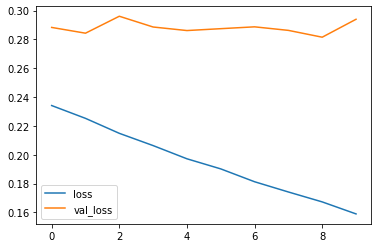

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

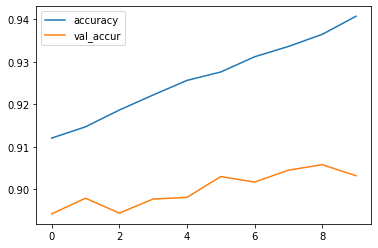

In [0]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accur')
plt.legend()

Confusion matrix, without normalization
[[881   0  15  20   2   0  75   0   7   0]
 [  5 977   1  14   0   0   2   0   1   0]
 [ 24   0 799  11  91   0  74   0   1   0]
 [ 27   8  11 903  39   0  11   0   1   0]
 [  0   1  71  19 871   0  38   0   0   0]
 [  1   0   0   1   0 977   0   8   1  12]
 [142   5  46  25  70   0 705   0   7   0]
 [  0   0   0   0   0  12   0 968   0  20]
 [  1   0   3   6   0   3   7   1 978   1]
 [  0   0   0   0   0   5   1  21   0 973]]


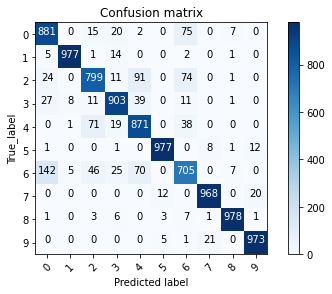

In [0]:
#plot Confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  #this function prints and plots the confusion matrix
  if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f'if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
#labels mapping
labels= '''Tshirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

TypeError: ignored

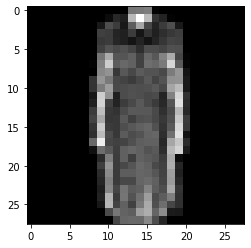

In [0]:
# Misclassified examples
misclassified_idx = np.where(p_test !=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i],p_test[i],labels[y_test[i]],labels[p_test[i]]));